In [116]:
# Cybersecurity Analysis with Machine Learning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
# Load the dataset
data = pd.read_csv("dataset .csv")

In [118]:
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [119]:
data.shape

(100000, 35)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [121]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64


In [122]:
# Standardize column names
data.columns = (
    data.columns.str.lower()  # Convert to lowercase
    .str.replace(' ', '_')   # Replace spaces with underscores
    .str.replace(r'[^\w]', '', regex=True)  # Remove special characters
)

# Verify the column names after standardization
print("Standardized column names:\n", data.columns)


Standardized column names:
 Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')


In [123]:
# Drop irrelevant columns
columns_to_drop = ['hash']  # Add other columns you want to drop here
data = data.drop(columns=columns_to_drop)


In [124]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [125]:
data.shape

(100000, 34)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   millisecond        100000 non-null  int64 
 1   classification     100000 non-null  object
 2   state              100000 non-null  int64 
 3   usage_counter      100000 non-null  int64 
 4   prio               100000 non-null  int64 
 5   static_prio        100000 non-null  int64 
 6   normal_prio        100000 non-null  int64 
 7   policy             100000 non-null  int64 
 8   vm_pgoff           100000 non-null  int64 
 9   vm_truncate_count  100000 non-null  int64 
 10  task_size          100000 non-null  int64 
 11  cached_hole_size   100000 non-null  int64 
 12  free_area_cache    100000 non-null  int64 
 13  mm_users           100000 non-null  int64 
 14  map_count          100000 non-null  int64 
 15  hiwater_rss        100000 non-null  int64 
 16  total_vm           10

In [127]:
# List of unnecessary features
unnecessary_features = [
    'cgtime', 'vm_pgoff', 'normal_prio', 'hiwater_rss', 'policy', 
    'lock', 'task_size', 'signal_nvcsw', 'cached_hole_size', 'nr_ptes', 'usage_counter'
]

# Drop unnecessary features
data = data.drop(columns=unnecessary_features)

# Drop the 'hash' column if it's just an identifier
data= data.drop(columns=['hash'], errors='ignore')  # Ignore if already removed

# Display cleaned dataset
print("Cleaned dataset shape:", data.shape)
print("Remaining columns:", data.columns.tolist())


Cleaned dataset shape: (100000, 23)
Remaining columns: ['millisecond', 'classification', 'state', 'prio', 'static_prio', 'vm_truncate_count', 'free_area_cache', 'mm_users', 'map_count', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'utime', 'stime', 'gtime']


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   millisecond        100000 non-null  int64 
 1   classification     100000 non-null  object
 2   state              100000 non-null  int64 
 3   prio               100000 non-null  int64 
 4   static_prio        100000 non-null  int64 
 5   vm_truncate_count  100000 non-null  int64 
 6   free_area_cache    100000 non-null  int64 
 7   mm_users           100000 non-null  int64 
 8   map_count          100000 non-null  int64 
 9   total_vm           100000 non-null  int64 
 10  shared_vm          100000 non-null  int64 
 11  exec_vm            100000 non-null  int64 
 12  reserved_vm        100000 non-null  int64 
 13  end_data           100000 non-null  int64 
 14  last_interval      100000 non-null  int64 
 15  nvcsw              100000 non-null  int64 
 16  nivcsw             10

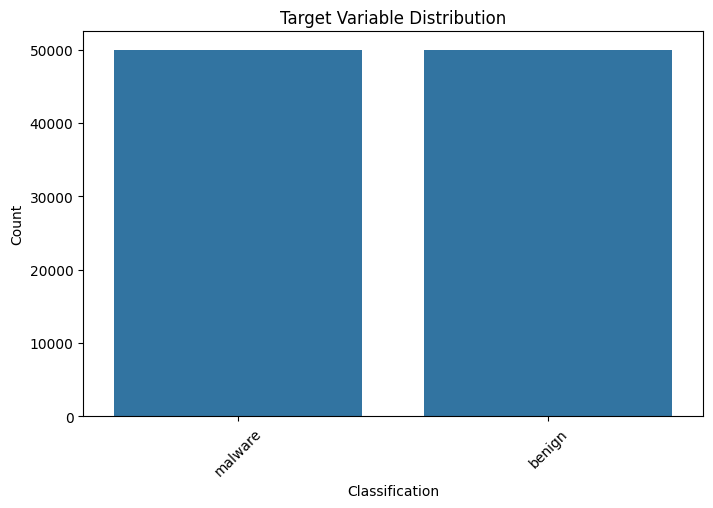

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='classification', order=data['classification'].value_counts().index)
plt.title("Target Variable Distribution")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


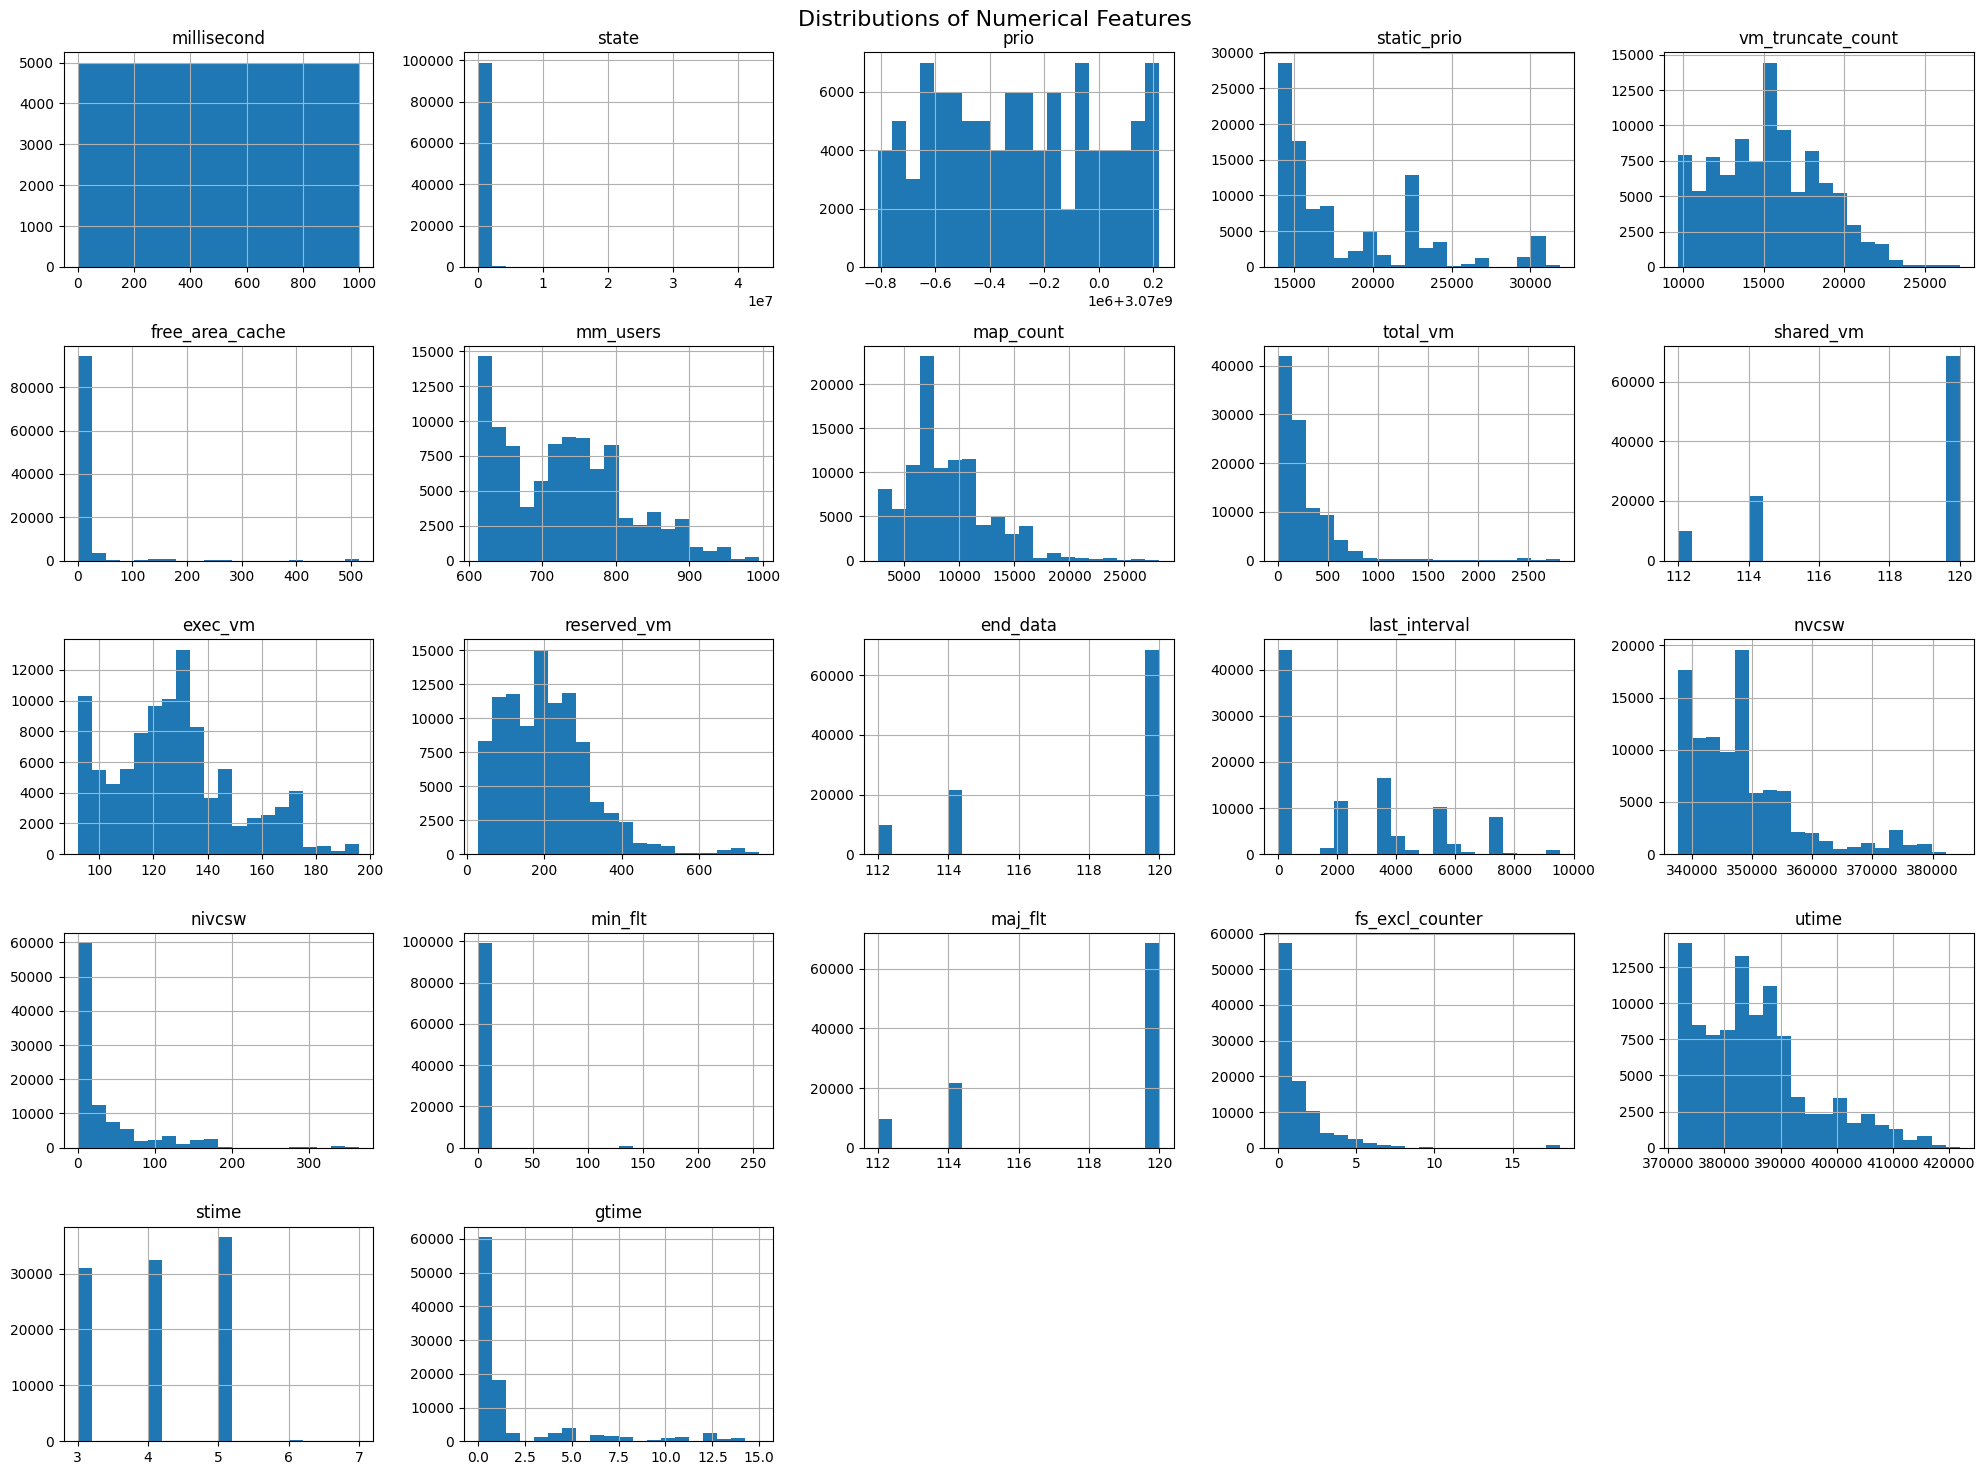

In [130]:
# Plot histograms for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

data[numerical_cols].hist(bins=20, figsize=(20, 15))
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


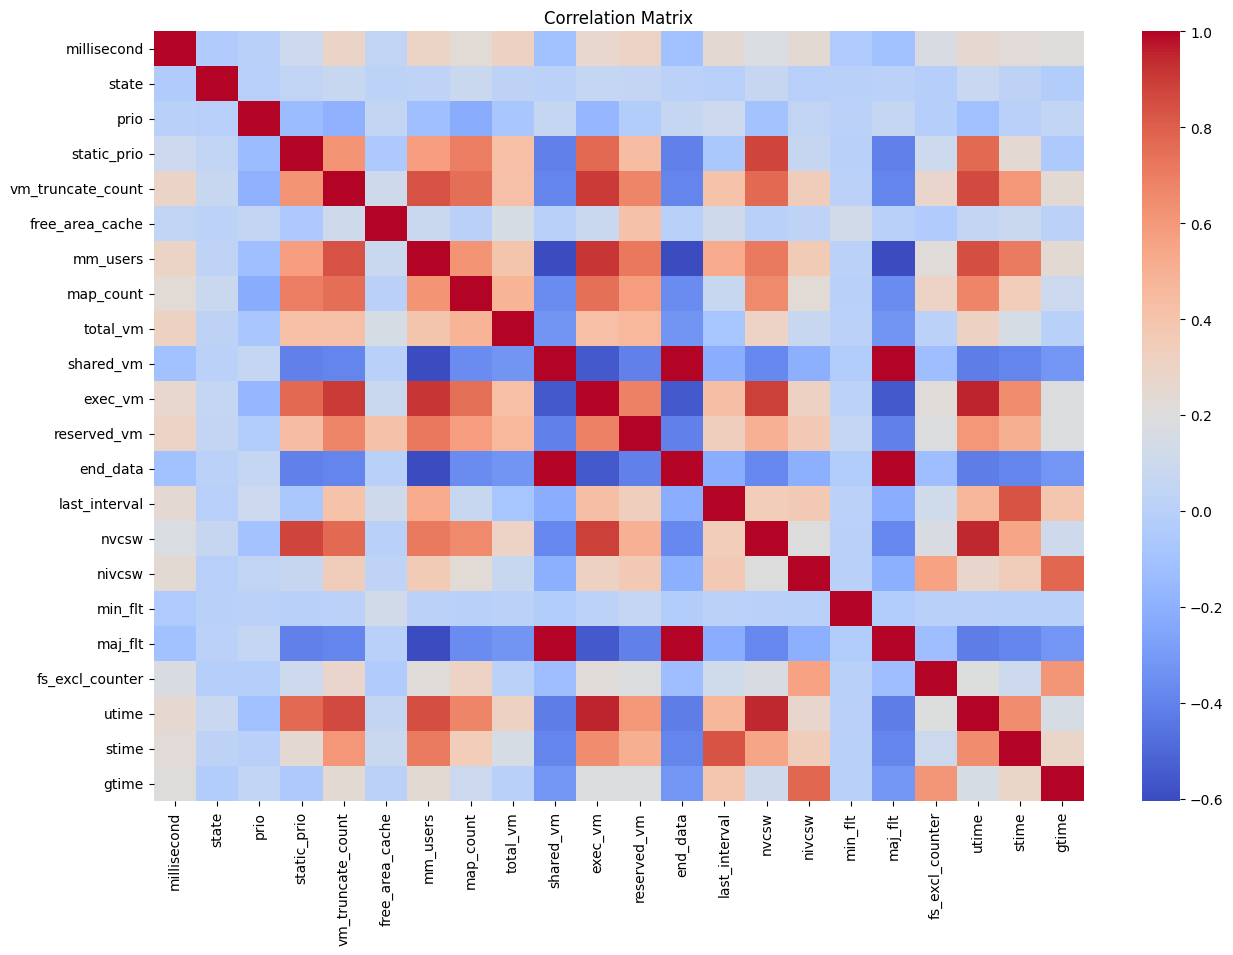

In [131]:
# Correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


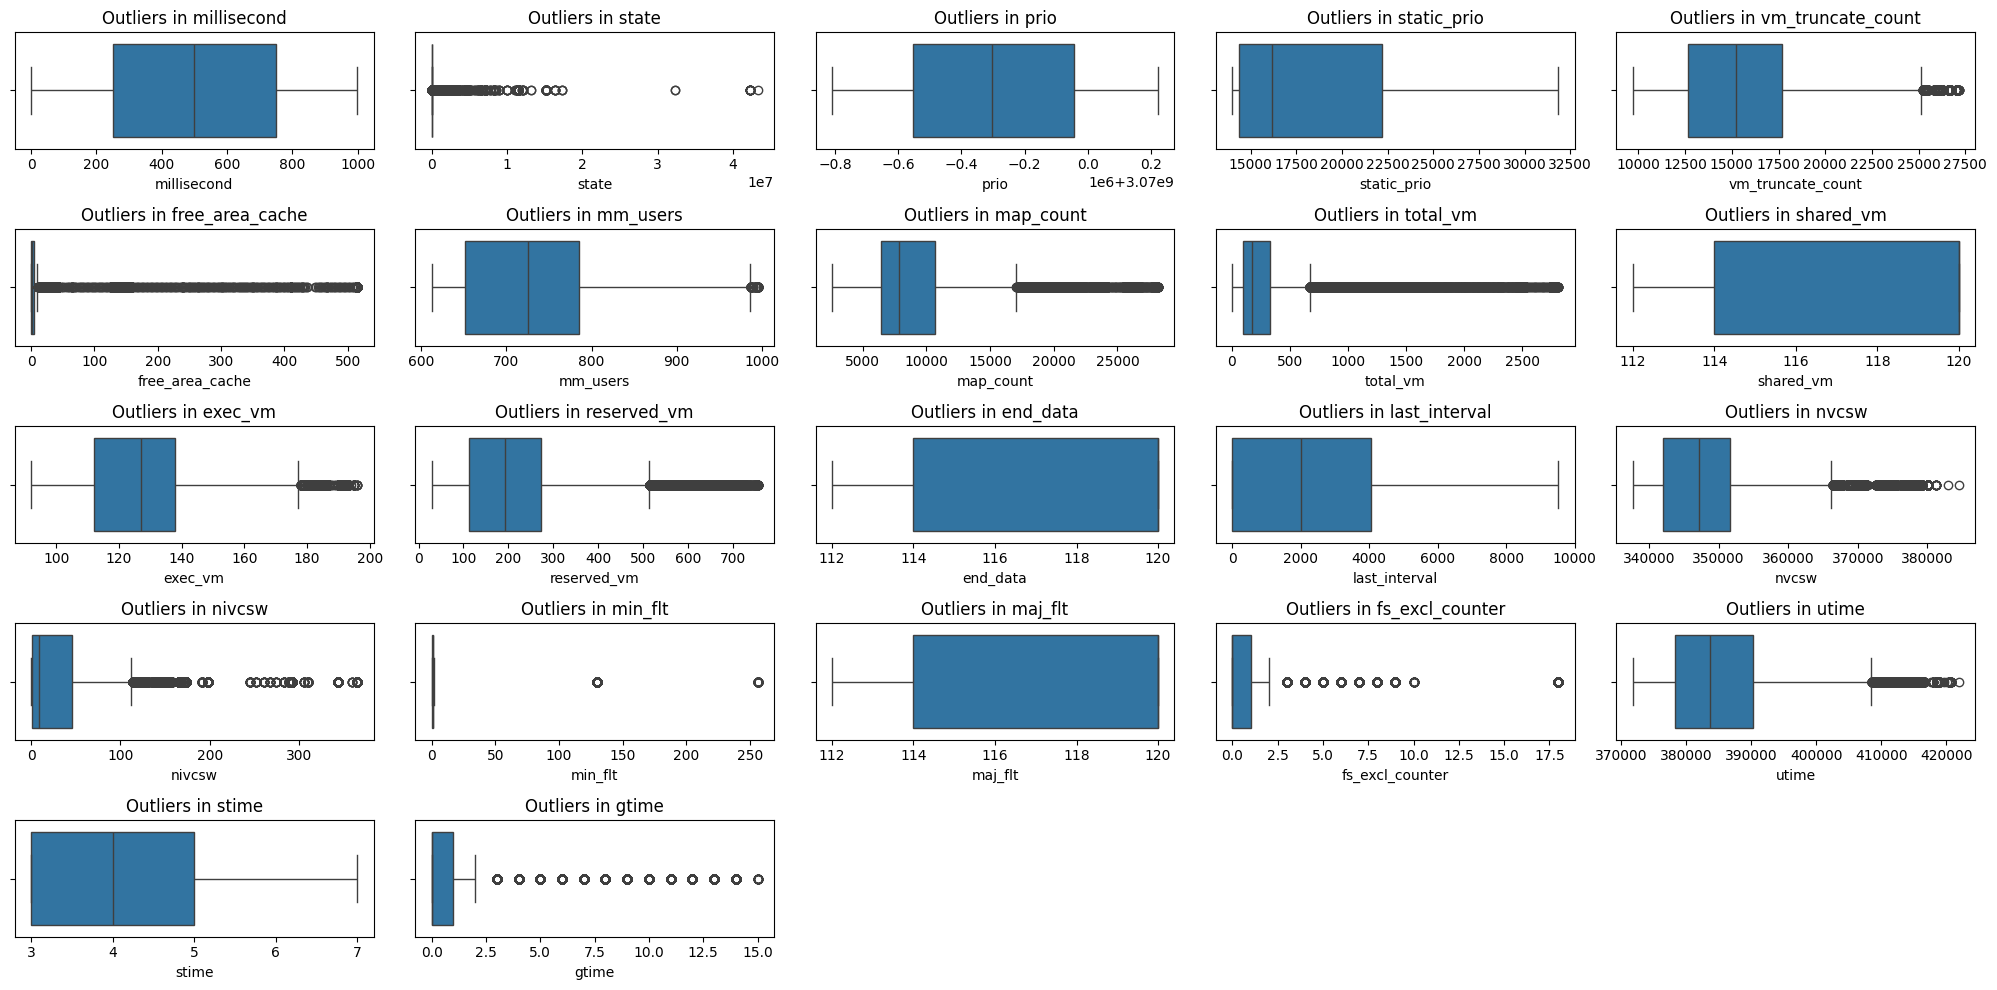

In [132]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Number of plots per row
plots_per_row = 5
n_rows = math.ceil(len(numerical_cols) / plots_per_row)  # Calculate number of rows required

# Create subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(20, 2 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each numerical column in the dataset
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# Hide empty subplots if the total number of plots isn't a multiple of `plots_per_row`
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [133]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Compute IQR for numerical features
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
data = data.copy()
for col in numerical_cols:
    data[col] = data[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Display summary of the capped dataset
print("Capped Dataset Shape:", data.shape)


Capped Dataset Shape: (100000, 23)


In [134]:
# Remove rows with outliers
data_without_outliers = data[((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)
]

# Display summary of the dataset after removing outliers
print("Dataset Shape after Removing Outliers:", data_without_outliers.shape)


Dataset Shape after Removing Outliers: (0, 23)


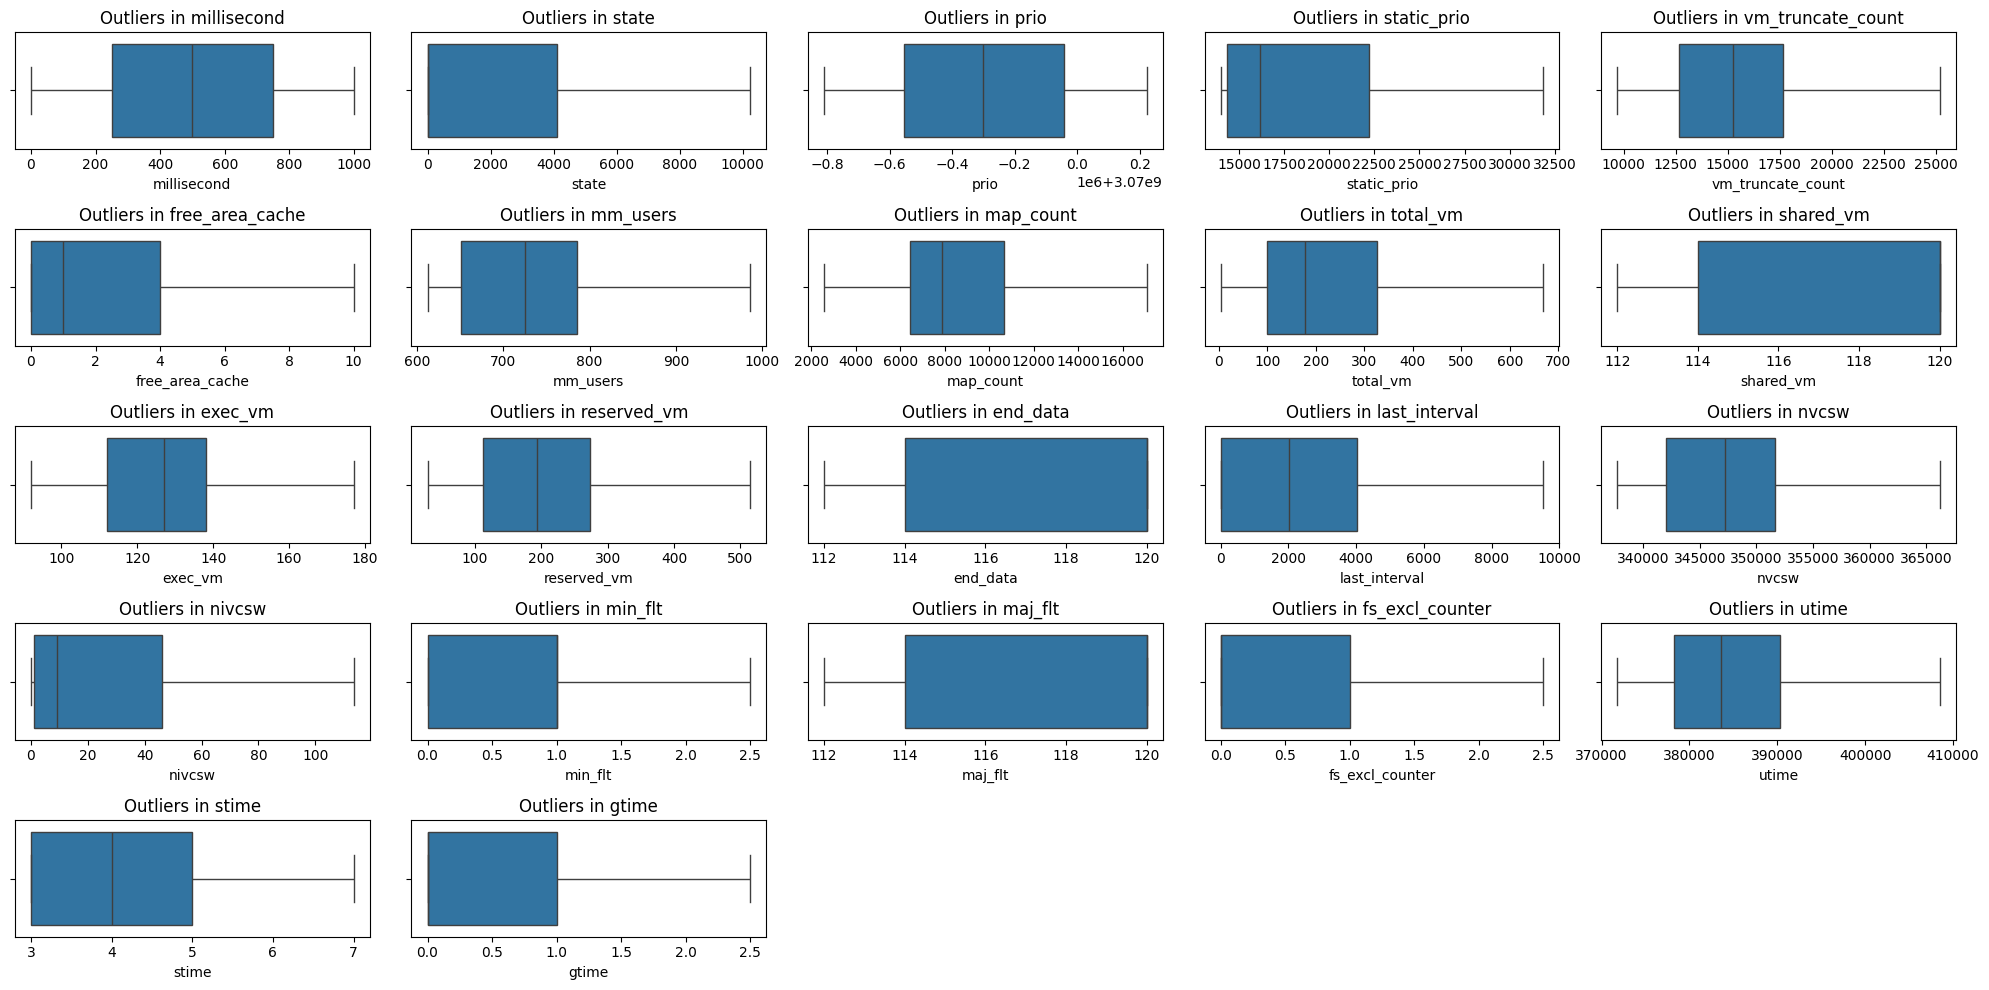

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

data_to_check = data 

# Plot boxplots for numerical columns
numerical_cols = data_to_check.select_dtypes(include=['int64', 'float64']).columns

# Create a grid of boxplots (7 per row)
import math

plots_per_row = 5
n_rows = math.ceil(len(numerical_cols) / plots_per_row)

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(20, 2 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data_to_check[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [136]:
# Preprocess the dataset
label_encoder = LabelEncoder()
data['classification'] = label_encoder.fit_transform(data['classification'])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Standardize numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Scaled Data:\n", data.head())


Scaled Data:
    millisecond  classification     state      prio  static_prio  \
0    -1.730320               1 -0.722394 -1.105059    -0.848177   
1    -1.726856               1 -0.722394 -1.105059    -0.848177   
2    -1.723391               1 -0.722394 -1.105059    -0.848177   
3    -1.719927               1 -0.722394 -1.105059    -0.848177   
4    -1.716463               1 -0.722394 -1.105059    -0.848177   

   vm_truncate_count  free_area_cache  mm_users  map_count  total_vm  ...  \
0          -0.658016         2.103215  -0.05277  -0.522261 -0.466305  ...   
1          -0.658016         2.103215  -0.05277  -0.522261 -0.466305  ...   
2          -0.658016         2.103215  -0.05277  -0.522261 -0.466305  ...   
3          -0.658016         2.103215  -0.05277  -0.522261 -0.466305  ...   
4          -0.658016         2.103215  -0.05277  -0.522261 -0.466305  ...   

   end_data  last_interval     nvcsw   nivcsw   min_flt   maj_flt  \
0  0.667258       0.398006 -0.751685 -0.74744 -1.34

In [138]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['classification']) 
y = data['classification']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80000, 22)
Testing set shape: (20000, 22)


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),  # Added max_depth for better control
    "Support Vector Machine (SVM)": SVC(kernel='linear', probability=True, random_state=42),  # Added SVM
    "Gradient Boosting (XGBoost)": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # Added XGBoost
}

MACHINE LEARNING MODELS

Confusion Matrix - Logistic Regression:
 [[9334  666]
 [ 545 9455]]
Classification Report - Logistic Regression:
               precision    recall  f1-score   support

      benign       0.94      0.93      0.94     10000
     malware       0.93      0.95      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



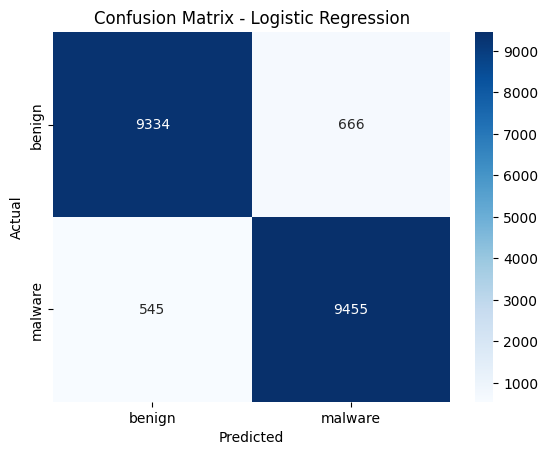

Confusion Matrix - Random Forest:
 [[10000     0]
 [    0 10000]]
Classification Report - Random Forest:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



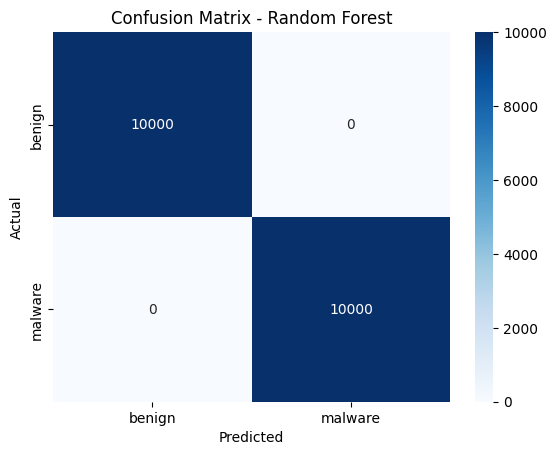

Confusion Matrix - Decision Tree:
 [[9783  217]
 [  98 9902]]
Classification Report - Decision Tree:
               precision    recall  f1-score   support

      benign       0.99      0.98      0.98     10000
     malware       0.98      0.99      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



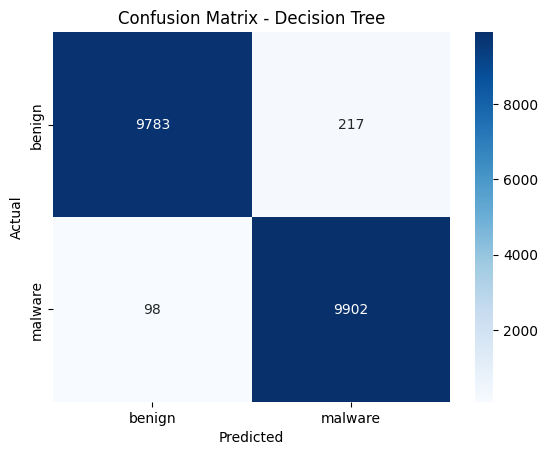

Confusion Matrix - Support Vector Machine (SVM):
 [[9396  604]
 [ 439 9561]]
Classification Report - Support Vector Machine (SVM):
               precision    recall  f1-score   support

      benign       0.96      0.94      0.95     10000
     malware       0.94      0.96      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



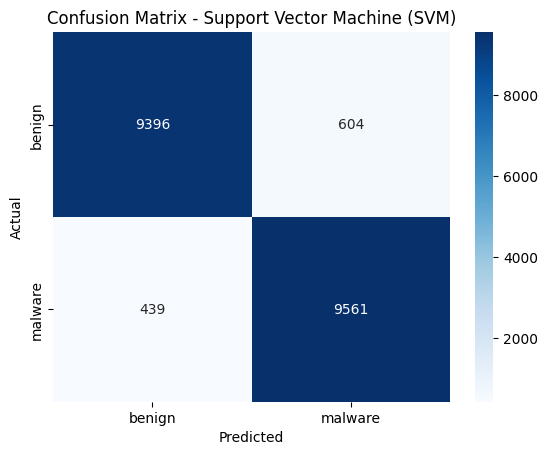

c:\Users\cmanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:47:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix - Gradient Boosting (XGBoost):
 [[10000     0]
 [    0 10000]]
Classification Report - Gradient Boosting (XGBoost):
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



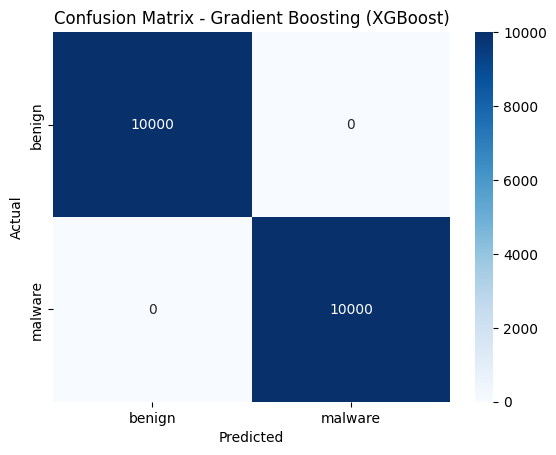

In [143]:
# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix - {name}:\n", cm)
    print(f"Classification Report - {name}:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()